# Informe Hito 1
Curso CC5205 - 1

Profesores: María José Zambrano y Felipe Bravo.

Auxiliares: Matías Miranda y Renzo Zanca.

Ayudantes: Diana Escobar, Gabriela Urbina, Juan Molina y Laura Maldonado.

Grupo 2

Integrantes: Ignacio Díaz, Ramiro Hoffens, Matías Núñez y Alonso Urbina.

# Introducción
La presencia de la salud mental en las discusiones en contextos académicos ha ido al alza en los últimos años. Esto muestra una problemática que plantea desafíos nuevos en los que se requiere evaluar la situación antes de pensar en el diseño, planificación e implementación de los eventuales planes que busquen solucionar dichos problemas.

A modo global, la Organización Mundial de la Salud atribuye al suicidio la tercera causa de muerte en personas entre 15 y 19 años. Acá en Chile, según  la X Encuesta Nacional de Juventudes, la prevalencia de síntomas depresivos y ansiosos es 26,9%. Es decir, uno de cada cuatro estudiantes presenta síntomas de este tipo.

El presente trabajo tomará una muestra de estudiantes de diversas carreras provenientes de la India, y tiene como objetivo trabajar preguntas en las que se busquen correlaciones entre hábitos, carreras, edades, y otros aspectos.

#Herramientas y datos

Para poner en práctica y trabajar con el tema planteado anteriormente se utilizó el data set "Student Depression Dataset".
Este fue recuperado de kaggle con el siguiente enlace: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data


Por otro lado, las librerias utilizadas hasta la finalización del hito 1 son las siguientes:
- kagglehub
- matplotlib
- numpy
- pandas
- scikit-learn
- seaborn

# Exploración y limpieza de datos
El plan de acción para esta etapa consistió en:
+ Comprobar la inexistencia de datos no válidos
+ Analizar las columnas y determinar en primera instancia cuales no serán útiles o se escapan del problema.
+ Para cada una de las columnas restantes, identificar instancias no representativas (o bien, poco representadas) para luego omitirlas.
+ Visualizar los datos, buscando patrones de interés: frecuencias, modas, porcentajes, etc.

Donde los encargados de esta tarea fueron: Ramiro Hoffens y Matías Núñez

Para revisar la existencia o no de datos nulos, estos se comprobaron en cada columna:

In [3]:
print("Nulos en el dataset:")
data.isna().sum()

Nulos en el dataset:


,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


En este hito además se omitieron algunos atributos del dataset que se estiman redundantes o poco útiles en principio. Estos son:

- *id*: Es indexación, redundante respecto al dataframe y no otorga información útil a los modelos de predicción.
- *Job Satisfaction*: No describe bien el dataset, ya que casi todos los valores son 0.
- *Profession*: Casi todas las instancias son 'student', así que consideraremos las instancias con este atributo y luego se dropea la columna.
- *Work Pressure*: Todas las instancias con atributo Profession igual a student tienen valor 0 en este atributo, luego la variable es irrelevante.

In [4]:
data['Profession'].value_counts()

,count
Profession,
Student,27870
Architect,8
Teacher,6
'Digital Marketer',3
Chef,2
'Content Writer',2
Pharmacist,2
Doctor,2
'UX/UI Designer',1


La eliminación de los atributos relacionados a trabajo tienen sentido al haber muy pocas personas encuestadas las cuales tienen una profesión, con lo cual, la mayoría de datos en estos resultaban ser los mismos (Se puede revisar el anexo para la visualización de ello).

La siguiente parte en la exploración de datos consistió en estudiar los atributos restantes, los cuales, en general contaban con datos outliners, donde estos en general estaban asociados.

Las columnas sin modificaciones fueron: Gender, CGPA, Have you ever..., Depression, Work/study hours, Family History.

El resto de atributos fueron modificados por dos razones: Existencia de datos ambiguos, datos outliers.
En la primera categoría tenemos las columnas: Finantial Stress, Sleep duration, Dietary Habits, y Degree. Mientras que en la segunda: Age, City, Academic Pressure, Study satisfaction.

Lo anterior se puede observar en mayor detalle en los Anexos.

# Preguntas y Problemas
Terminado el análisis exploratorio, se pueden realizar preguntas sobre los atributos y datos resultantes de ello.

- ¿Que atributos del dataset tienen mayor influencia sobre el diagnóstico de Depresión y la presencia de ideación? ¿Son atributos distintos para cada label?
- ¿Podemos identificar cualitativamente los hábitos de los estudiantes?¿Nos sirve esto para la predicción de atributos?. ¿Podemos hacer lo mismo con sus circunstancias personales?
- ¿Cuáles factores son mejores predictores del rendimiento académico de los estudiantes: las variables personales (edad, género, ciudad de residencia, estrés financiero, duración del sueño, hábitos alimenticios) o las variables académicas (presión académica, satisfacción con los estudios, horas de estudio/trabajo, tipo de carrera o grado académico)?


# Propuesta experimental

- Pregunta 1:
    - Primera parte:
        - Implementar modelos de predicción sobre todos los atributos, con targets depresión e ideación suicida.
        - Comparar métricasde modelos de clasificación.
    - Segunda parte:
        - Normalizar los datos a escala 0-1.
        - Realizar un análisis de componentes principales (PCA).
        - Concluir a partir de las ponderaciones de las primeras componentes.
        - Mediante los atributos obtenidos implementar modelos de clasificación y comparar métricas.
- Pregunta 2:
    - Seleccionar los atributos que representen cada aspecto a analizar.
    - Transformar las variables a variables numéricas.
    - Normalizar los datos.
    - Realizar clustering (k-means, DBSCAN, jerárquico).
    - Comparar los modelos usando métricas.
    - Interpretar los clusters
    - Analizar la distribución de las labels en los clusters obtenidos.
- Pregunta 3:
    - Generar dos datasets, uno por cada conjunto de atributos a estudiar.
    - Generar datasets normalizados para los modelos que lo requieran.
    - Mediante los atributos obtenidos implementar modelos de clasificación sobre CGPA y comparar métricas para cada dataset y cada modelo.

## Exploraciones y búsqueda de patrones iniciales
La parte de búsqueda de patrones iniciales, junto con la realización de la primera parte de la pregunta 1 fue realizada por: Ignacio Díaz y Alonso Urbina.

Algunas variables parecen tener correlación positiva entre ellas, la idea es verificar estadísticamente si existe o no. Además, verificar otras estadísticas de los datos.


In [43]:
# Moda de cada columna
print("Moda de cada columna:")
data.mode().head()

Moda de cada columna:


,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,24.0,Kalyan,3.0,8.04,4.0,'Less than 5 hours',Unhealthy,'Class 12',Yes,10.0,5.0,No,1


Nos interesa saber si hay correspondencia entre ideación suicida y depresión, para saber si la variable es relevante. Usamos ideación suicida como "modelo de predicción" de depresión para verificar esto:

Text(0.5, 1.0, 'Matriz de confusión entre depresión e ideación suicida')

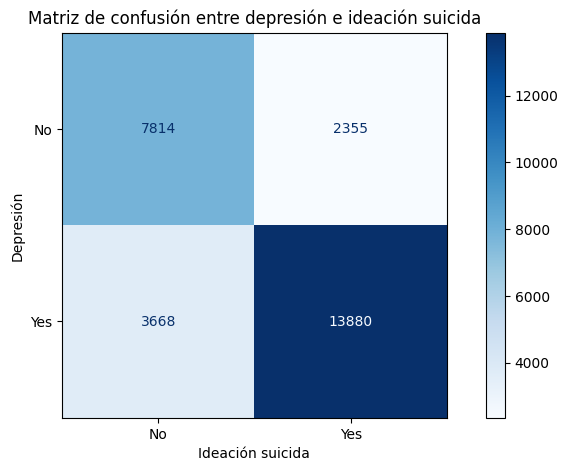

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
d = {'Yes': 1, 'No': 0}
fig, ax = plt.subplots(figsize=(10, 5))
matrix = confusion_matrix(data['Have you ever had suicidal thoughts ?'].map(d), data['Depression'])
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['No', 'Yes'])
display.plot(cmap='Blues', ax=ax)
ax.set_ylabel('Depresión')
ax.set_xlabel('Ideación suicida')
ax.set_title('Matriz de confusión entre depresión e ideación suicida')

De la misma forma, repetimos pero con los antecedentes de condiciones mentales en la familia.

Text(0.5, 1.0, 'Matriz de confusión entre depresión y antecedentes de condiciones mentales en la familia')

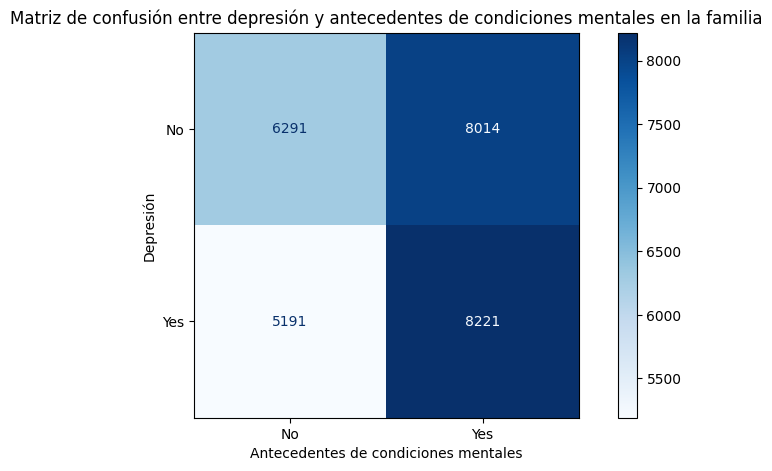

In [45]:
d = {'Yes': 1, 'No': 0}
fig, ax = plt.subplots(figsize=(10, 5))
matrix = confusion_matrix(data['Family History of Mental Illness'].map(d), data['Depression'])
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['No', 'Yes'])
display.plot(cmap='Blues', ax=ax)
ax.set_ylabel('Depresión')
ax.set_xlabel('Antecedentes de condiciones mentales')
ax.set_title('Matriz de confusión entre depresión y antecedentes de condiciones mentales en la familia')

### CGPA respecto a la label

<ipython-input-46-8eb6edf4ec0b>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.groupby('Depression').boxplot(column='CGPA', ax=ax)


Text(0.5, 0.98, 'Boxplot de CGPA por presencia de depresión')

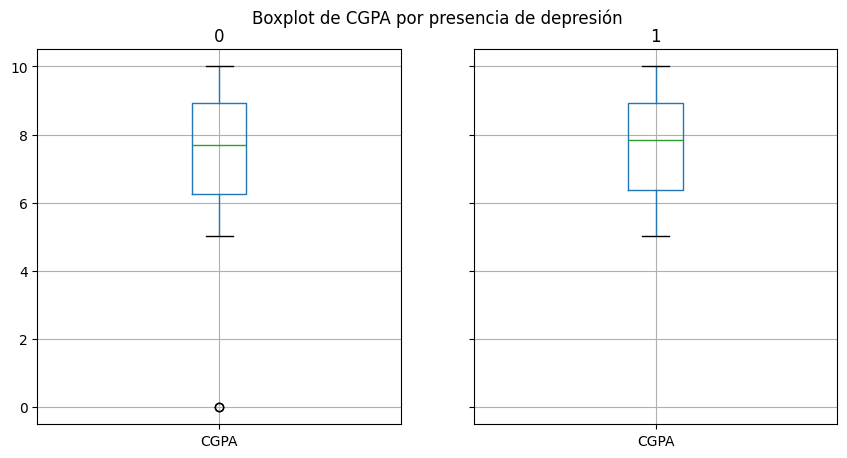

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
data.groupby('Depression').boxplot(column='CGPA', ax=ax)
fig.suptitle('Boxplot de CGPA por presencia de depresión')

In [47]:
data.to_csv("dataset.csv", index=False)

## Predicción de la label 'Depression'


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X = data.drop(columns=['Depression'])
y = data['Depression']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)
rndf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=93)
rndf.fit(X_train, y_train)
y_pred = rndf.predict(X_test)
# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2266
           1       0.86      0.88      0.87      3278

    accuracy                           0.85      5544
   macro avg       0.84      0.84      0.84      5544
weighted avg       0.85      0.85      0.85      5544



Text(0.5, 1.0, 'Matriz de confusión entre depresión y predicción')

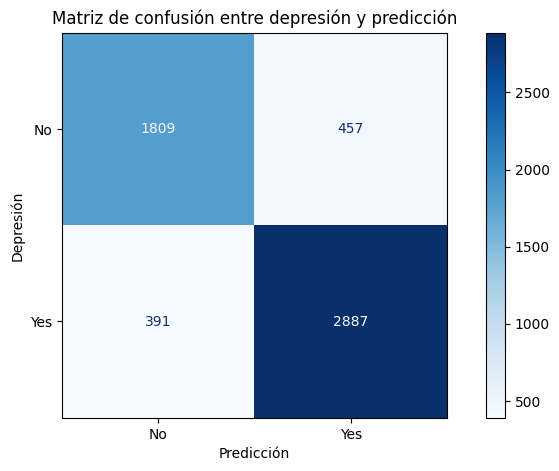

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 5))
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
display.plot(cmap='Blues', ax=ax)
ax.set_ylabel('Depresión')
ax.set_xlabel('Predicción')
ax.set_title('Matriz de confusión entre depresión y predicción')

## Predicción de ideaciones suicidas

In [50]:
X = data.drop(columns=['Have you ever had suicidal thoughts ?'])
y = data['Have you ever had suicidal thoughts ?']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)
rndf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=93)
rndf.fit(X_train, y_train)
y_pred = rndf.predict(X_test)
# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1 Score: 0.78

Classification Report:
              precision    recall  f1-score   support

          No       0.69      0.74      0.71      2060
         Yes       0.84      0.80      0.82      3484

    accuracy                           0.78      5544
   macro avg       0.76      0.77      0.77      5544
weighted avg       0.78      0.78      0.78      5544



Text(0.5, 1.0, 'Matriz de confusión entre ideación y predicción')

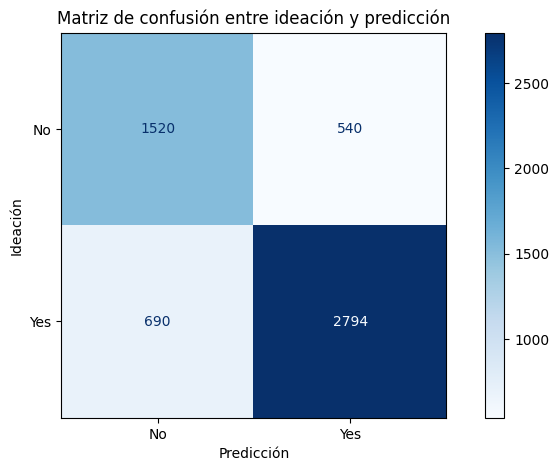

In [51]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 5))
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
display.plot(cmap='Blues', ax=ax)
ax.set_ylabel('Ideación')
ax.set_xlabel('Predicción')
ax.set_title('Matriz de confusión entre ideación y predicción')

#Anexo
En esta parte del informe se encuentra todo el código con el que se estudiaron los diferentes atributos del data set elegido, junto con el análisis de estos, eliminación de datos y columnas.

##Pasos Iniciales

Lo primero que debe realizarse es la instalación de las librerías necesarias para poder trabajar con los datos.

In [1]:
!pip install kagglehub
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn

Luego de ello se importan las diferentes librerías a utilizar, junto con el set de datos a utilizar en el proyecto.

In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KernelDensity

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

data = pd.read_csv(path + "/student_depression_dataset.csv")

Path to dataset files: /kaggle/input/student-depression-dataset



##Eliminación de columnas
Esta parte está enfocada en la eliminación completa de columnas, que por el análisis realizado no eran útiles en el estudio.

### Job Satisfaction

In [5]:
data['Job Satisfaction'].value_counts()

,count
Job Satisfaction,
0.0,27893
2.0,3
4.0,2
1.0,2
3.0,1


Como se ve, casi todas las instancias tienen el mismo valor, es por ello que se puede considerar que la variable no es relevante o de utilidad.

In [6]:
data.drop(columns='Job Satisfaction', inplace=True)

### Profession

In [7]:
data['Profession'].value_counts()

,count
Profession,
Student,27870
Architect,8
Teacher,6
'Digital Marketer',3
Chef,2
'Content Writer',2
Pharmacist,2
Doctor,2
'UX/UI Designer',1


Buscamos analizar solo estudiantes, y al ser pocas las otras instancias con valores diferentes en este atributo, podemos eliminar estas instancias y luego al solo tener estudiantes podemos dropear la columna.

In [8]:
data = data[data['Profession'] == 'Student']
data.drop(columns='Profession', inplace=True)

<ipython-input-8-66ea7c56e04b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns='Profession', inplace=True)


### id y Work Pressure

Por lo mencionado anteriormente solo dropeamos las columnas.

In [9]:
data.drop(columns='id', inplace=True)
data.drop(columns='Work Pressure', inplace=True)

## Limpieza y preprocesamiento de datos

Ahora verificamos las instancias para los atributos restantes.

### Gender

In [10]:
data['Gender'].value_counts().sort_index()

,count
Gender,
Female,12341
Male,15529


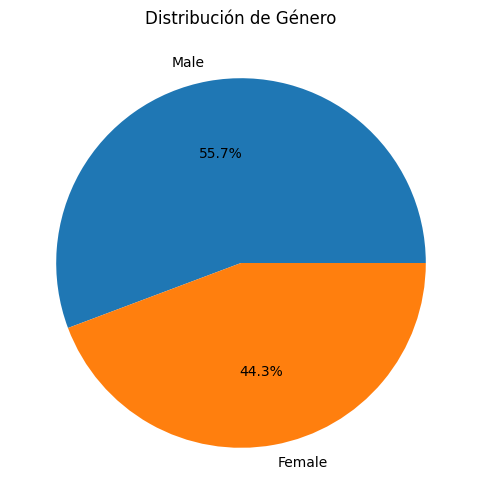

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Male', 'Female'], ax=ax)
ax.set_title('Distribución de Género')
ax.set_ylabel('')  # Elimina la etiqueta del eje Y
plt.show()

### Age

In [12]:
data['Age'].value_counts().sort_index()

,count
Age,
18.0,1587
19.0,1560
20.0,2237
21.0,1723
22.0,1159
23.0,1641
24.0,2255
25.0,1781
26.0,1154


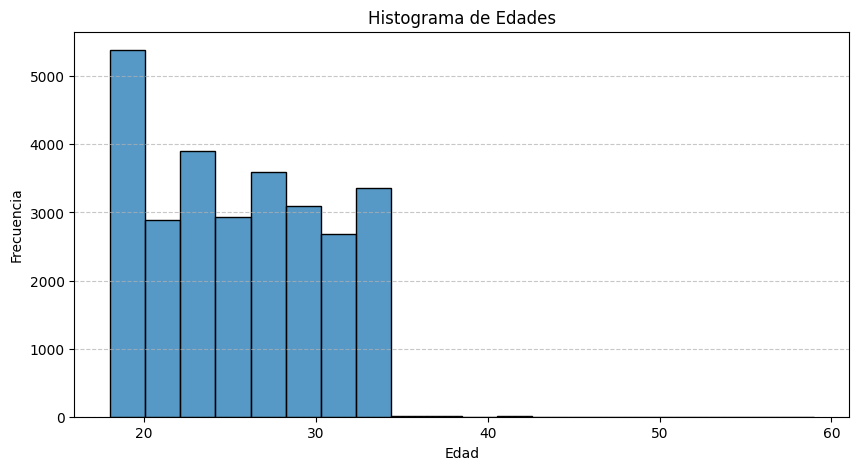

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=20, kde=False)
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Text(0.5, 1.0, 'Ages $<= 34$ vs Ages $> 34$')

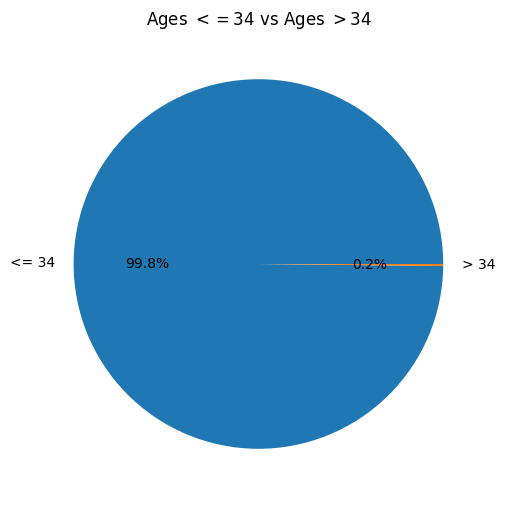

In [14]:
# pie chart representing ages <= 34 versus ages > 34
edades = [data['Age'].value_counts().sort_index().loc[18:34].sum(), data['Age'].value_counts().sort_index().loc[35:].sum()]
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(edades, labels=['<= 34', '> 34'], autopct='%1.1f%%')
ax.set_title('Ages $<= 34$ vs Ages $> 34$')

Hasta los 34 años hay una cantidad similar de registros. Mas allá de eso el dataset contiene menos de 10 datos por grupo etario, por lo que si se quiere estudiar la data por edad, habría que dejar fuera ese 0.2% de los datos.

In [15]:
data = data[data['Age'] <= 34]

(0.0, 1.0)

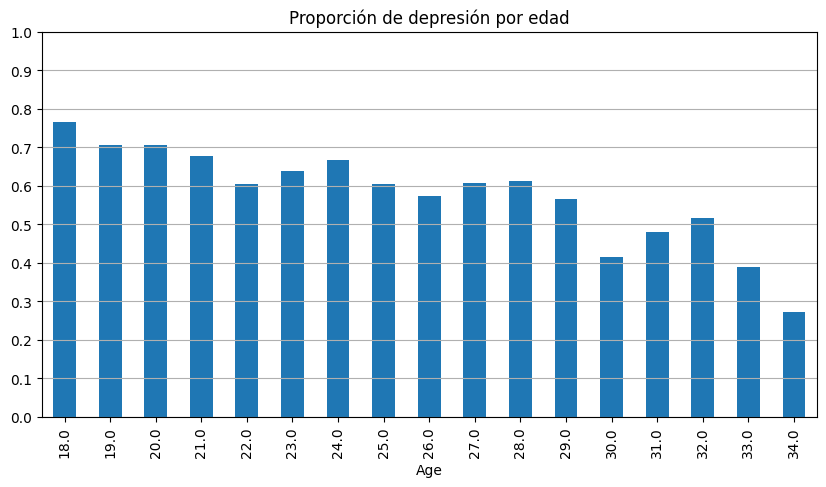

In [16]:
ax = data[data['Age'] <= 34].groupby('Age')['Depression'].mean().plot(kind='bar', figsize=(10, 5), title='Proporción de depresión por edad')
ax.grid(True, axis='y', which='major')
ax.set_yticks([i * 0.1 for i in range(11)])
ax.set_ylim(0, 1)

### Financial Stress
Se encontraron tres instancias con este atributo en valor '?'. Se quitan estas instancias del dataframe.

In [17]:
data['Financial Stress'].value_counts()

,count
Financial Stress,
5.0,6691
4.0,5754
3.0,5213
1.0,5111
2.0,5049
?,3


In [18]:
data = data[data['Financial Stress'] != '?']

### City

In [19]:
print(data['City'].value_counts())

City
Kalyan                  1561
Srinagar                1370
Hyderabad               1336
Vasai-Virar             1288
Lucknow                 1153
Thane                   1138
Ludhiana                1106
Agra                    1089
Surat                   1076
Kolkata                 1062
Jaipur                  1034
Patna                   1002
Pune                     967
Visakhapatnam            965
Ahmedabad                949
Bhopal                   931
Chennai                  882
Meerut                   820
Rajkot                   812
Delhi                    766
Bangalore                765
Ghaziabad                742
Mumbai                   697
Vadodara                 692
Varanasi                 683
Nagpur                   650
Indore                   643
Kanpur                   607
Nashik                   545
Faridabad                461
Saanvi                     2
Bhavna                     2
City                       2
Harsha                     2
'Less Del

Eliminamos las instancias con ciudades que tengan menos que 3 ejemplos, pues no son muestra significativa.

In [20]:
city_counts = data['City'].value_counts()
cities_to_keep = city_counts[city_counts >= 3].index
data = data[data['City'].isin(cities_to_keep)]

### Academic Pressure

In [21]:
data['Academic Pressure'].value_counts()

,count
Academic Pressure,
3.0,7429
5.0,6268
4.0,5142
1.0,4782
2.0,4164
0.0,7


Hay solo 7 instancias con valor 0, como la muestra es poco significativa, las eliminamos.

In [22]:
data = data[data['Academic Pressure'] != 0]

### CGPA

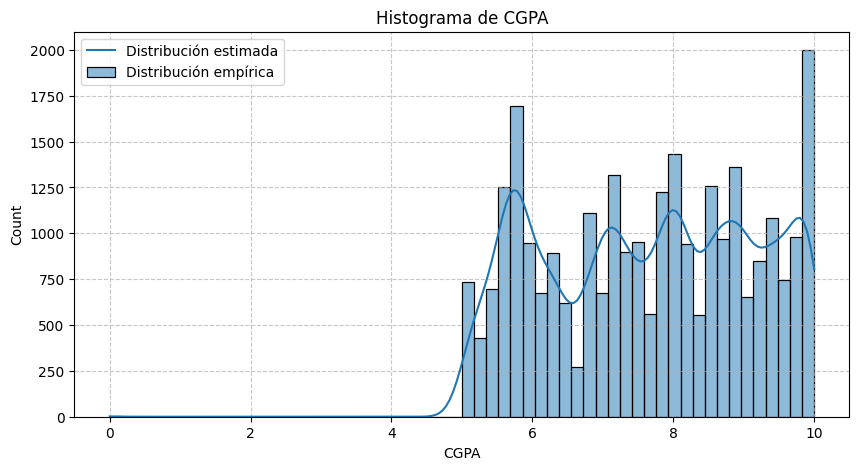

In [23]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data[['CGPA']])

# sns.histplot(kde.sample(1_000_000))
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data['CGPA'], kde=True, ax=ax)
ax.set_title('Histograma de CGPA')
ax.legend(['Distribución estimada', 'Distribución empírica'])
ax.grid(True, linestyle='--', alpha=0.7)

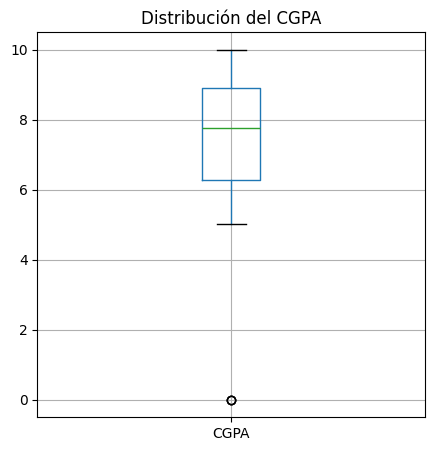

In [24]:
ax = data.boxplot(column='CGPA', figsize=(5, 5))
ax.set_title('Distribución del CGPA')
plt.show()

### Study Satisfaction

In [25]:
data['Study Satisfaction'].value_counts()

,count
Study Satisfaction,
4.0,6338
2.0,5821
3.0,5795
1.0,5424
5.0,4404
0.0,3


Pocas instancias con Study Satisfaction 0, las eliminamos.

In [26]:
data = data[data['Study Satisfaction'] != 0]

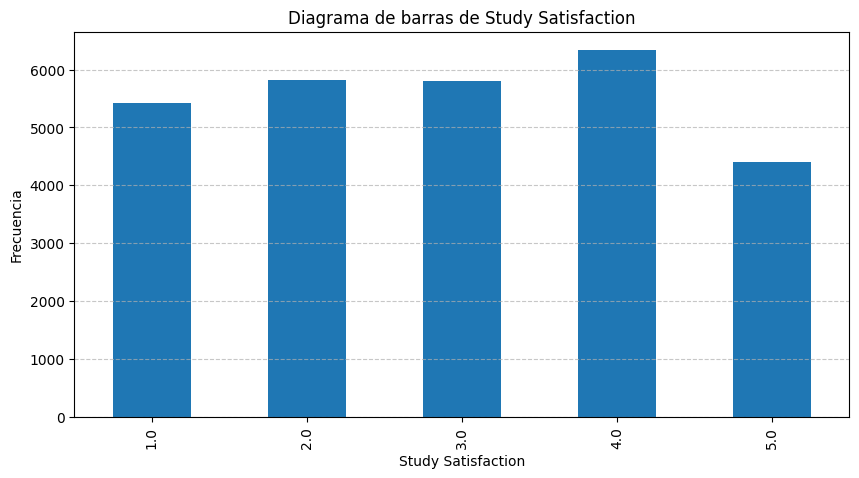

In [27]:
data['Study Satisfaction'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Diagrama de barras de Study Satisfaction')
plt.xlabel('Study Satisfaction')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Sleep Durations

In [28]:
data['Sleep Duration'].value_counts()

,count
Sleep Duration,
'Less than 5 hours',8280
'7-8 hours',7313
'5-6 hours',6150
'More than 8 hours',6021
Others,18


Un par de instancias con valor "Others", los eliminamos.

In [29]:
data = data[data['Sleep Duration'] != 'Others']

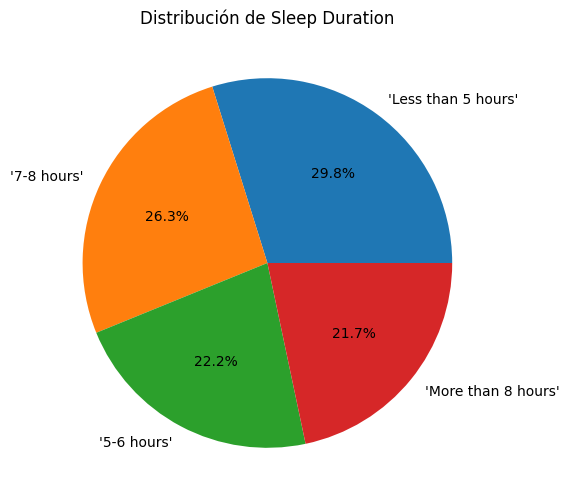

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))
data['Sleep Duration'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
ax.set_title('Distribución de Sleep Duration')
ax.set_ylabel('')  # Elimina la etiqueta del eje Y
plt.show()

### Dietary Habits

In [31]:
data['Dietary Habits'].value_counts()

,count
Dietary Habits,
Unhealthy,10271
Moderate,9868
Healthy,7613
Others,12


12 Instancias con Others, los eliminamos

In [32]:
data = data[data['Dietary Habits'] != 'Others']

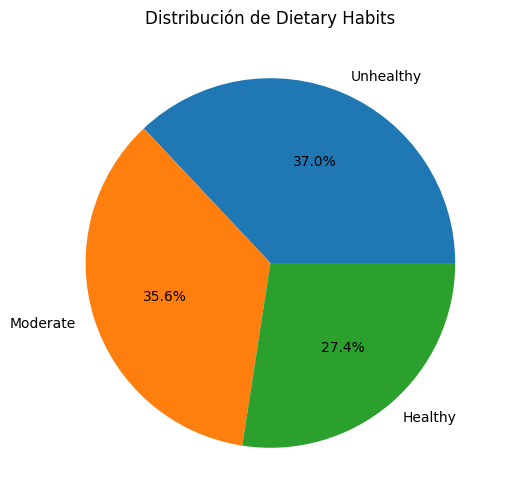

In [33]:
fig, ax = plt.subplots(figsize=(6, 6))
data['Dietary Habits'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
ax.set_title('Distribución de Dietary Habits')
ax.set_ylabel('')  # Elimina la etiqueta del eje Y
plt.show()

### Degree

In [34]:
data['Degree'].value_counts()

,count
Degree,
'Class 12',6054
B.Ed,1856
B.Com,1500
B.Arch,1473
BCA,1428
MSc,1181
B.Tech,1151
MCA,1035
M.Tech,1018


In [35]:
data = data[data['Degree'] != 'Others']

### Have you ever...

In [36]:
data['Have you ever had suicidal thoughts ?'].value_counts()

,count
Have you ever had suicidal thoughts ?,
Yes,17548
No,10169


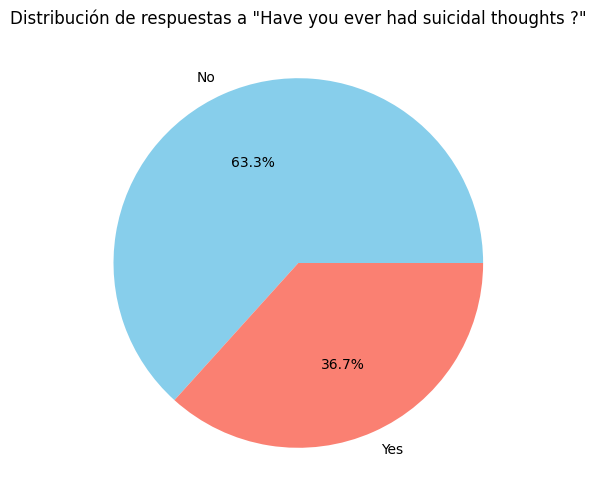

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))
data['Have you ever had suicidal thoughts ?'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['No', 'Yes'], ax=ax, colors=['skyblue', 'salmon']
)
ax.set_title('Distribución de respuestas a "Have you ever had suicidal thoughts ?"')
ax.set_ylabel('')  # Elimina la etiqueta del eje Y
plt.show()

### Work/study hours

In [38]:
data['Work/Study Hours'].value_counts()

,count
Work/Study Hours,
10.0,4214
12.0,3151
11.0,2879
8.0,2499
6.0,2238
9.0,2014
7.0,1989
0.0,1686
4.0,1600


In [39]:
data['Financial Stress'].value_counts()

,count
Financial Stress,
5.0,6664
4.0,5737
3.0,5194
1.0,5086
2.0,5036


Borramos instancias con ?

In [40]:
data = data[data['Financial Stress'] != '?']

### Family History

In [41]:
data['Family History of Mental Illness'].value_counts()

,count
Family History of Mental Illness,
No,14305
Yes,13412


### Depression

In [42]:
data['Depression'].value_counts()

,count
Depression,
1,16235
0,11482
